In [1]:
data_path = "/home/sthomas/projects/LB_mixing"
import os
os.environ['MATPLOTLIBRC'] = "../matplotlibrc" 
BSU_BLUE = "#0033A0"
BSU_ORANGE = "#D64309"

In [2]:
import signac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from scipy.signal import argrelextrema as argex
import matplotlib.cm as cm
import itertools

            
names={'iso':'Isothermal','lin_ramp':'Linear Ramp','step':'Step'}
colors={'iso':'C0','lin_ramp':'C1','step':'C2'}
markers={'iso':'s','lin_ramp':'P','step':'>'}
linestyles={'iso':'-','lin_ramp':'--','step':'-.'}

project = signac.get_project(data_path)
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df = df.sort_values('T')

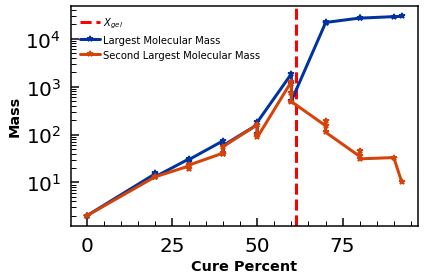

In [3]:
df_filtered = df[(df.bond==True)]
df_sorted = df_filtered.sort_values('cure_percent')
df_100 = df_filtered[df_filtered.stop_after_percent>80]

plt.axvline(x=df_100['curing_at_gel_point'][0],
            color='r',
            linestyle='--',
           label='$X_{gel}$')
plt.plot(df_sorted['cure_percent'],
         df_sorted['largest_network'],
         marker='*',
         label='Largest Molecular Mass',
        color=BSU_BLUE)
plt.plot(df_sorted['cure_percent'],
         df_sorted['second_largest_network'],
         marker='*',
         label='Second Largest Molecular Mass',
        color=BSU_ORANGE)
plt.yscale('log')
plt.xlabel('Cure Percent')
plt.ylabel('Mass')
plt.legend(fontsize=10)
plt.savefig("gel_point.png", transparent=True)

In [4]:
df_100

mix_time log_curing AC_interaction  \
998d6cd1126f71497f7116e79f2cfd46     5000       True       0.902604   
f11b9ec95dae968696f6fb8d49c7e06d     5000       True       0.902604   

                                 calibrationT  bond CC_interaction  \
998d6cd1126f71497f7116e79f2cfd46          305  True          0.884   
f11b9ec95dae968696f6fb8d49c7e06d          305  True          0.884   

                                 n_particles shrinkT nl_tuning CC_bond_dist  \
998d6cd1126f71497f7116e79f2cfd46       50000       4     False            1   
f11b9ec95dae968696f6fb8d49c7e06d       50000       4     False            1   

                                  ... SASO_model_R2 num_clusters mike_SP  \
998d6cd1126f71497f7116e79f2cfd46  ...      0.987388         27.0    True   
f11b9ec95dae968696f6fb8d49c7e06d  ...      0.987716         54.0    True   

                                       volume       D_A       D_C  \
998d6cd1126f71497f7116e79f2cfd46  50030.82812  0.000545  0.005812   
f11b9ec95dae968696f6fb8d49c7e06d  50013.73828  0.000528  0.005698   

                                 second_largest_network SAFO_model_R2  \
998d6cd1126f71497f7116e79f2cfd46                   10.0           NaN   
f11b9ec95dae968696f6fb8d49c7e06d                   33.0           NaN   

                                                         signac_id  \
998d6cd1126f71497f7116e79f2cfd46  998d6cd1126f71497f7116e79f2cfd46   
f11b9ec95dae968696f6fb8d49c7e06d  f11b9ec95dae968696f6fb8d49c7e06d   

                                                                        root  
998d6cd1126f71497f7116e79f2cfd46  /home/sthomas/projects/LB_mixing/workspace  
f11b9ec95dae968696f6fb8d49c7e06d  /home/sthomas/projects/LB_mixing/workspace  

[2 rows x 104 columns]

In [5]:
len(df_sorted[df_sorted["cure_percent"] > 80])

2

In [26]:
second_largest = df_sorted["second_largest_network"].to_list()
largest = df_sorted["largest_network"].to_list()
cure_percent = df_sorted["cure_percent"].to_list()

for lar, s_lar, cp in zip(largest, second_largest, cure_percent):
    print(round(cp, -1))

0.0
0.0
0.0
20.0
20.0
20.0
30.0
30.0
30.0
40.0
40.0
40.0
50.0
50.0
50.0
60.0
60.0
60.0
70.0
70.0
70.0
80.0
80.0
80.0
90.0
90.0


In [29]:
df_sorted.groupby("cure_percent")

In [30]:
new_df = df_sorted.copy()

In [22]:
df_sorted.index

Index(['bb5828d680fadaf6f19b55f89c4a62b1', '37c543ffebeb70f1a63e2996bdc067b3',
       'eb5b2142784ad0becf27564deae596eb', 'f0ade767045b4d76e3f8d7201f35c5d3',
       '2b9c483baab186d6c6d8f76accf21de9', '343c6735407b0628d2c89153f1fe5b71',
       '071482f95e4c1d546e7ed1dda9b1849f', '321462c5f20469c6336b545f9a069b97',
       '364d746ba29624d7c4675dba7925738f', '2bff4412159cb91f72300fa47899785f',
       '504483a0d4b999f53e690779537814cd', '067ecba12d0cafa8d1317d4a5339048a',
       '8c3710c4a91e29707751ad61dca4006d', '6530bdc87d0e5f2aca75cd4685154135',
       'd2644c7b9c244420fad6dbf1555a25da', '0f6abaca05ca4b0001f9d9a80faf2559',
       '691ef18568be3e89f748a07dd49ac727', '54de10dabe1b5ecab000917e4452ce9d',
       '342648e6091e3b6e02b76837e5e48049', '97c0c857ef80db3b32e1521e29338bd8',
       '2767496fc4a5c711fa7eb91a95c58d3e', '3eb523dcbac2528a7df7b51175aabeb5',
       'b6f7fc2d1859e39ea710c08b0170fa68', '06967d6c40b6f16d47f9caf13b7a2bad',
       'f11b9ec95dae968696f6fb8d49c7e06d', '998d6cd1

In [88]:
new_df.groupby("cure_percent")["second_largest_network"].std().

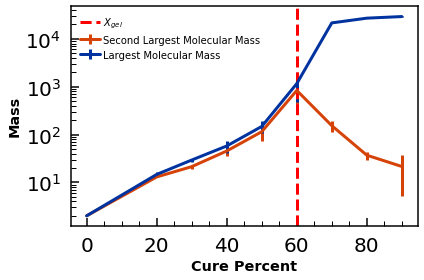

In [111]:
cp = [0, 20, 30, 40, 50, 60, 70, 80, 90]

sln = new_df.groupby("cure_percent")["second_largest_network"].mean()
sln_std = new_df.groupby("cure_percent")["second_largest_network"].std()
ln = new_df.groupby("cure_percent")["largest_network"].mean()
ln_std = new_df.groupby("cure_percent")["largest_network"].std()

plt.errorbar(cp, sln, yerr=sln_std, color=BSU_ORANGE, label="Second Largest Molecular Mass")
plt.errorbar(cp, ln, yerr=ln_std, color=BSU_BLUE, label="Largest Molecular Mass")
plt.axvline(x=60,
            color='r',
            linestyle='--',
           label='$X_{gel}$')
plt.yscale("log")
plt.xlabel('Cure Percent')
plt.ylabel('Mass')
plt.legend(fontsize=10)
plt.savefig("gel_point.png", transparent=True)

In [77]:
new_df.groupby("cure_percent").get_group('cure_percent')

KeyError: 'cure_percent'

In [106]:
new_df[['curing_at_gel_point','cure_percent']]

curing_at_gel_point  cure_percent
bb5828d680fadaf6f19b55f89c4a62b1             0.002500           0.0
37c543ffebeb70f1a63e2996bdc067b3             0.002500           0.0
eb5b2142784ad0becf27564deae596eb             0.002500           0.0
f0ade767045b4d76e3f8d7201f35c5d3             0.000000          20.0
2b9c483baab186d6c6d8f76accf21de9             0.000000          20.0
343c6735407b0628d2c89153f1fe5b71            20.000000          20.0
071482f95e4c1d546e7ed1dda9b1849f             0.000000          30.0
321462c5f20469c6336b545f9a069b97             0.000000          30.0
364d746ba29624d7c4675dba7925738f             0.000000          30.0
2bff4412159cb91f72300fa47899785f             0.000000          40.0
504483a0d4b999f53e690779537814cd             0.000000          40.0
067ecba12d0cafa8d1317d4a5339048a             0.000000          40.0
8c3710c4a91e29707751ad61dca4006d             0.000000          50.0
6530bdc87d0e5f2aca75cd4685154135            23.195000          50.0
d2644c7b9c244420fad6dbf1555a25da            40.187500          50.0
0f6abaca05ca4b0001f9d9a80faf2559            52.564999          60.0
691ef18568be3e89f748a07dd49ac727            40.632500          60.0
54de10dabe1b5ecab000917e4452ce9d             0.000000          60.0
342648e6091e3b6e02b76837e5e48049            52.417500          70.0
97c0c857ef80db3b32e1521e29338bd8            61.709999          70.0
2767496fc4a5c711fa7eb91a95c58d3e            61.014999          70.0
3eb523dcbac2528a7df7b51175aabeb5            52.715000          80.0
b6f7fc2d1859e39ea710c08b0170fa68            61.455002          80.0
06967d6c40b6f16d47f9caf13b7a2bad            61.422501          80.0
f11b9ec95dae968696f6fb8d49c7e06d            61.439999          90.0
998d6cd1126f71497f7116e79f2cfd46            61.455002          90.0

In [80]:
new_df.groupby("cure_percent").to_frame()

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_frame'